
# Name: Aaditya Champaneri 

# Data Science and Business Analytics Intern at THE SPARKS FOUNDATION


# Task-1: Predict the percentage of a student based on the num. of study     hours.
 
# Prediction using Supervised ML



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn


In [2]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)

In [3]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Discover and Visulaize the data to getting insights

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.shape

(25, 2)

In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


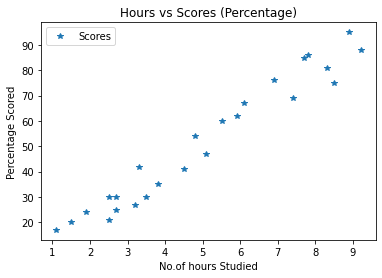

In [8]:
data.plot(x="Hours",y="Scores",style="*")
plt.xlabel("No.of hours Studied")
plt.ylabel("Percentage Scored")
plt.title("Hours vs Scores (Percentage)")
plt.show()

# PREPARING THE DATA

In [9]:
x=data.iloc[:, :-1].values
y=data.iloc[:, 1].values

In [10]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [11]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [12]:
#Now, Splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0)

# TRAINING THE MODEL

In [13]:
from sklearn.linear_model import LinearRegression
regmodel = LinearRegression()
regmodel.fit(x_train,y_train)

print("TRAINING SUCCESSFUL")

TRAINING SUCCESSFUL


# PLOTTING THE REGRESSION LINE

In [14]:
#Now, printing the coefficient and intercept values.
regmodel.coef_


array([9.91065648])

In [15]:
regmodel.intercept_

2.018160041434683

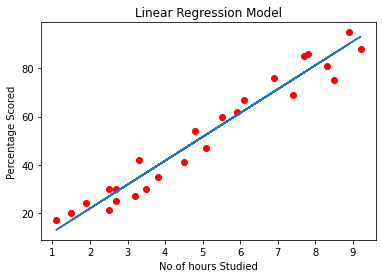

In [16]:
line = regmodel.coef_*x +regmodel.intercept_ #Based on Y=mx+c
plt.scatter(x,y,color='red')
plt.xlabel("No.of hours Studied")
plt.ylabel("Percentage Scored")
plt.title("Linear Regression Model")
plt.plot(x,line)
plt.show()

# PREDICTING THE SCORES

In [17]:
print(x_test) #testing data in hours

y_pred = regmodel.predict(x_test) #Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [18]:
data = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


<AxesSubplot:>

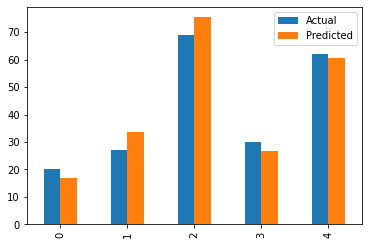

In [19]:
data.plot(kind='bar')

In [20]:
#predicting values by data
hours = [9.25]
own_pred = regmodel.predict([hours])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [9.25]
Predicted Score = 93.69173248737538


# Evaluting model

In [21]:
from sklearn import metrics
print("Mean Absolute Error = ",metrics.mean_absolute_error(y_test,y_pred))

#mean absolute error(MAE) is a measure of errors between paired observations expressing the same phenomenon,
#absolute error is expressed as the difference between the expected and actual values.

Mean Absolute Error =  4.183859899002975
